# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
#lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_df = pd.DataFrame(cities,columns={"City"})
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Wind Speed"] = ""

s = 0
count = 1

for index,row in cities_df.iterrows():
    city = row["City"]
    if index%50==0:
        s+=1
        count=1
    
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {count} of Set {s} | {city}")
        cities_df.loc[index,"Lat"] = response['coord']['lat']
        cities_df.loc[index,"Lng"] =response["coord"]["lon"]
        cities_df.loc[index,"Max Temp"] = response['main']['temp_max']
        cities_df.loc[index,"Cloudiness"] =response["clouds"]["all"]
        cities_df.loc[index,"Country"] =response["sys"]["country"]
        cities_df.loc[index,"Date"] = response["dt"]
        cities_df.loc[index,"Humidity"] = response["main"]["humidity"]
        cities_df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        count+=1
    except:
        print("City not found. Skipping...")
    


Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | sabang
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | derzhavinsk
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | povenets
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | mumbwa
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | merauke
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | viedma
Processing Record 20 of Set 1 | nalut
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | katobu


Processing Record 32 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 32 of Set 4 | beloha
Processing Record 33 of Set 4 | madison heights
Processing Record 34 of Set 4 | upernavik
Processing Record 35 of Set 4 | hofn
Processing Record 36 of Set 4 | beringovskiy
Processing Record 37 of Set 4 | sabha
Processing Record 38 of Set 4 | xingyi
Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | emerald
Processing Record 41 of Set 4 | nguiu
City not found. Skipping...
Processing Record 41 of Set 4 | ust-kuyga
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | narsaq
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | guangyuan
Processing Record 3 of Set 5 | kuhdasht
Processing Record 4 of Set 5 | saint george
Processing Record 5 of Set 5 | misratah
Processing Record 6 of Set 5 | pedasi
Processing Record 7 of Set 5 | grand gaube
Processing Record 8 of Set 5 | mareeba
Processing Record 9 of Set 5 | saskylakh
Pro

Processing Record 26 of Set 8 | san cristobal
Processing Record 27 of Set 8 | cuamba
Processing Record 28 of Set 8 | maceio
Processing Record 29 of Set 8 | qorveh
Processing Record 30 of Set 8 | puerto escondido
Processing Record 31 of Set 8 | sabinas hidalgo
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | puerto ayacucho
Processing Record 34 of Set 8 | nurota
Processing Record 35 of Set 8 | pensacola
Processing Record 36 of Set 8 | san antonio
Processing Record 37 of Set 8 | garowe
Processing Record 38 of Set 8 | dingle
Processing Record 39 of Set 8 | olafsvik
City not found. Skipping...
Processing Record 39 of Set 8 | sulmona
Processing Record 40 of Set 8 | manaure
Processing Record 41 of Set 8 | sedlcany
Processing Record 42 of Set 8 | chokurdakh
Processing Record 43 of Set 8 | cardston
Processing Record 44 of Set 8 | ystad
Processing Record 45 of Set 8 | yenagoa
Processing Record 46 of Set 8 | eyl
Processing Record 47 of Set 8 | alofi
Processing Record 48 o

Processing Record 16 of Set 12 | play cu
City not found. Skipping...
Processing Record 16 of Set 12 | kaoma
Processing Record 17 of Set 12 | tilichiki
Processing Record 18 of Set 12 | pemberton
Processing Record 19 of Set 12 | porto novo
Processing Record 20 of Set 12 | ahuimanu
Processing Record 21 of Set 12 | verkhoyansk
Processing Record 22 of Set 12 | karratha
Processing Record 23 of Set 12 | nyurba
Processing Record 24 of Set 12 | christchurch
Processing Record 25 of Set 12 | karamay
City not found. Skipping...
Processing Record 25 of Set 12 | sechura
Processing Record 26 of Set 12 | kahului
Processing Record 27 of Set 12 | dovolnoye
Processing Record 28 of Set 12 | saint anthony
Processing Record 29 of Set 12 | pacific grove
Processing Record 30 of Set 12 | jojoima
Processing Record 31 of Set 12 | tabou
Processing Record 32 of Set 12 | koungou
City not found. Skipping...
Processing Record 32 of Set 12 | jardim
Processing Record 33 of Set 12 | luganville
Processing Record 34 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = cities_df[cities_df["Humidity"]!=""].reset_index()
cities_df.to_csv("Cities_data.csv", index=False)
cities_df.head()

,index,City,Lat,Lng,Max Temp,Cloudiness,Country,Date,Humidity,Wind Speed
0,0,mataura,-46.19,168.86,46.9,92,NZ,1542664536,98,19.01
1,1,tasiilaq,65.61,-37.64,37.4,92,GL,1542660600,86,51.67
2,2,saint-philippe,45.36,-73.48,35.06,90,CA,1542662100,74,2.24
3,3,sabang,13.72,123.58,79.79,92,PH,1542664970,88,16.78
4,4,hermanus,-34.42,19.24,56.22,0,ZA,1542664527,96,3.02


In [5]:
cities_df.count()

index         557
City          557
Lat           557
Lng           557
Max Temp      557
Cloudiness    557
Country       557
Date          557
Humidity      557
Wind Speed    557
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

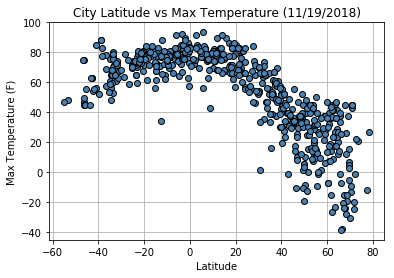

In [6]:
fig, ax = plt.subplots()
ax.plot(cities_df["Lat"],cities_df["Max Temp"], label = "Max Temperature", color='steelblue', marker='o', mec = "k",
        linewidth=0, markersize=6)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs Max Temperature (11/19/2018)")
plt.grid()
plt.savefig("Temp_Lat.png")
plt.show()

#### Latitude vs. Humidity Plot

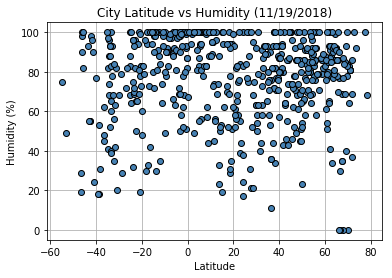

In [13]:
fig, ax = plt.subplots()
ax.plot(cities_df["Lat"],cities_df["Humidity"], label = "Humidity", color='steelblue', marker='o', mec = "k",
        linewidth=0, markersize=6)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs Humidity (11/19/2018)")
ax.set_ylim(-5,105)
plt.grid()
plt.savefig("Humidity_Lat.png")
plt.show()

#### Latitude vs. Cloudiness Plot

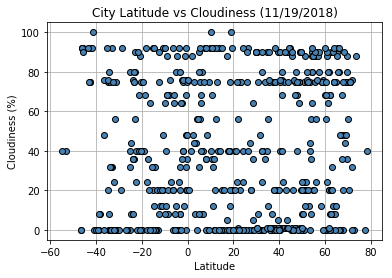

In [8]:
fig, ax = plt.subplots()
ax.plot(cities_df["Lat"],cities_df["Cloudiness"], label = "Humidity", color='steelblue', marker='o', mec = "k",
        linewidth=0, markersize=6)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs Cloudiness (11/19/2018)")
plt.grid()
plt.savefig("Cloudiness_Lat.png")
plt.show()

#### Latitude vs. Wind Speed Plot

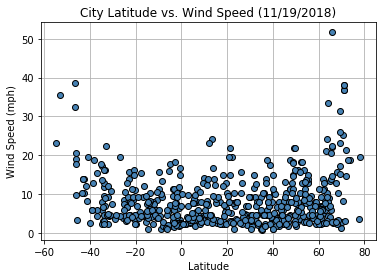

In [9]:
fig, ax = plt.subplots()
ax.plot(cities_df["Lat"],cities_df["Wind Speed"], label = "Humidity", color='steelblue', marker='o', mec = "k",
        linewidth=0, markersize=6)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (11/19/2018)")
plt.grid()
plt.savefig("Windspeed_Lat.png")
plt.show()